In [1]:
#导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.markers
import networkx as nx

In [2]:
#周期序列
Q=np.array([0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18])

In [3]:
#getDHVGPoint函数：输入序列Q，返回需要连接的两点坐标的集合
def getDHVGPoint(Q):
    #坐标
    x=np.array(range(1,len(Q)+1))
    y=np.array(Q)

    #准备序列a,b，将相连的两点的x坐标分别记录在a,b序列中
    a=[]
    b=[]

    #遍历,获得连接两点的横坐标
    #控制ta移动
    for ta in range(0,len(x)-1):
        #控制tb移动
        for tb in range(ta+1,len(x)):
            ta=ta
            ya=y[ta]
            tb=tb
            yb=y[tb]
            #tc在ta,tb之间
            tc=np.array(range(ta+1,tb))
            yc=y[(ta+1):tb]
            #如果相邻，或者值1大于值2，则记录下来
            #并打印相连的两点的坐标用(ta,tb)表示
            if tb-ta==1 or min(np.array([ya,yb]))>max(yc) :
                a.append(ta)
                b.append(tb)
                #print('(',ta,',',tb,')')
    arr=[a,b]
    return arr

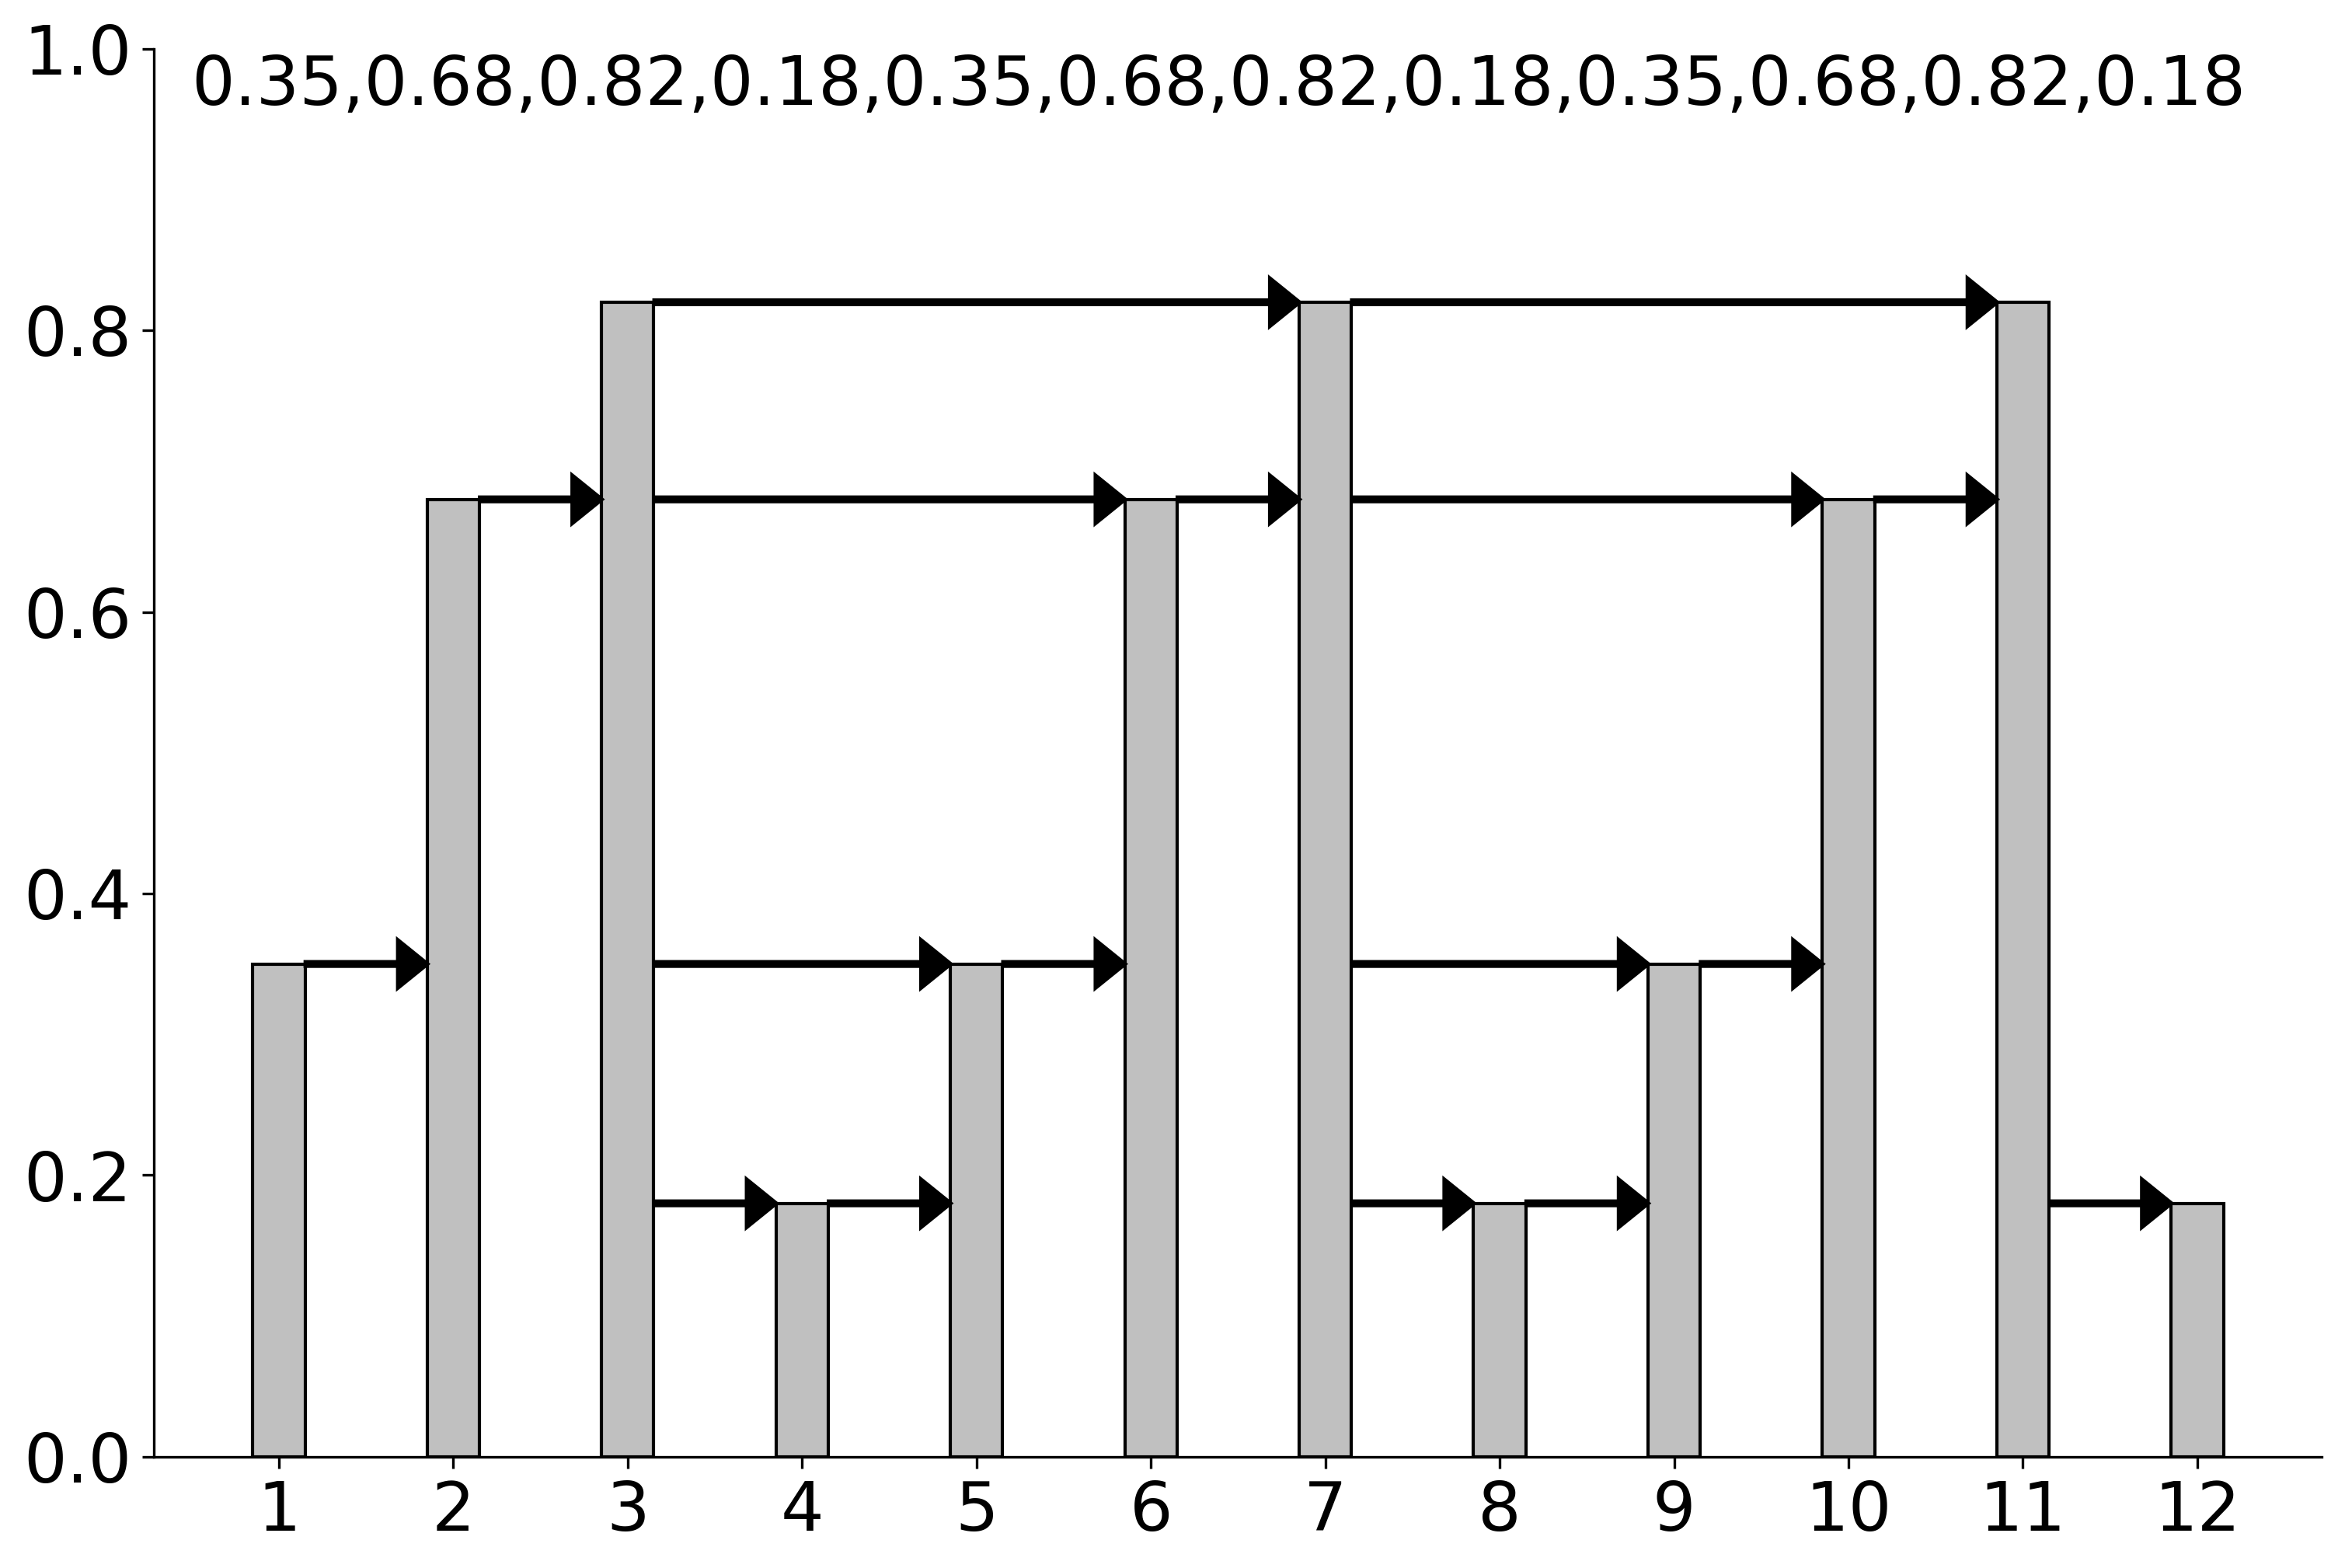

In [4]:
#DHVG_bar函数：输入序列Q，输出DHVG条形图（需先调用getVGPoint函数）
def DHVG_bar(Q):
    #准备画布，和一个坐标轴
    fig = plt.figure(figsize=(12, 8), dpi=300)#设置图形大小
    ax = fig.add_subplot(111)
    
    #设置样式
    #ax.set_yticks([])#不显示y坐标轴标签
    plt.ylim(0,1)
    plt.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)#不显示上边框
    ax.spines['right'].set_visible(False)#不显示右边框
    
    #画条形图
    x= np.array(range(0,len(Q)))
    p1=ax.bar(x,Q,width=0.3,color='#C0C0C0',edgecolor='black',zorder=10)

    #获取要连接两点的坐标
    arr=getDHVGPoint(Q)

    #在图中连接两点
    for i in range(0,len(arr[0])):
        p2=ax.arrow(arr[0][i]+0.16, min([Q[arr[0][i]],Q[arr[1][i]]]),arr[1][i]-0.16-(arr[0][i]+0.16),0,color='black',length_includes_head=True,head_width=0.03,head_length=0.15,linewidth=2,zorder=11)
        
    #设置x轴刻度的值（为直方条高度），调整字体大小
    plt.xticks(x,range(1, len(Q) + 1),fontsize=21)
    plt.yticks(fontsize=21)
    
    
    plt.text(-0.5,0.96, "0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18", size=21,
         bbox=dict(boxstyle="square",
                  color="#FFFFFF"
                   )
         )
    
    plt.rcParams['xtick.direction'] = 'in' #将x轴的刻度线方向设置向内
    plt.rcParams['ytick.direction'] = 'in' #将y轴的刻度方向设置向内
    
    #保存图片
    #plt.savefig('E:\\DHVG_bar.png',bbox_inches="tight",dpi=600)
    
    #显示图像
    plt.show()
    
#调用
DHVG_bar(Q)

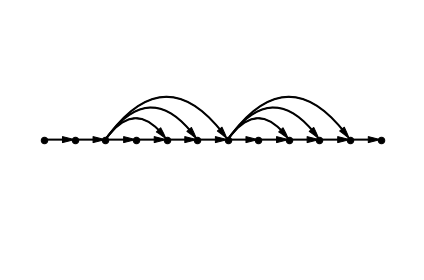

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
def DHVG_net(Q):
    arr=getDHVGPoint(Q)
    x=np.array(range(0,len(Q)))
    G = nx.DiGraph()        # 无多重边无向图

    #点
    G.add_nodes_from(x)  # 添加多个节点

    #边
    for i in range(0,len(arr[0])):
        if arr[1][i]-arr[0][i]==1:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0)
        else:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0.7)

    #位置
    pos=dict()
    for i in range(len(Q),-1,-1):
        sd={i:(i,0)}
        pos={**sd,**pos}
    #print(edge)

    ax = plt.gca()###重要，必需存在

    #画点
    nx.draw_networkx_nodes(G, pos, node_size=42, nodelist=x, node_color="black")


    for edge in G.edges(data=True):
        if edge[1]-edge[0]==1:
                rad=0
        else:
                rad=0.7
        
        arrowprops=dict(color="black", 
                        shrink=0.01,
                        headwidth=6,
                        width=1.0,
                        connectionstyle=f'arc3, rad = -{edge[2]["rad"]}')
        ax.annotate("", xy=[edge[1],0], xytext=[edge[0],0],arrowprops=arrowprops)
    ax.margins(0.11)
    plt.tight_layout()
    plt.axis("off")
    #plt.savefig('E:\\DHVG_net.png',dpi=600)
    plt.show()

DHVG_net(Q)